## Data Cleaning and EDA

### 1. Basic data checking

In [1]:
import sys
sys.executable

'/Library/Frameworks/Python.framework/Versions/3.7/bin/python3'

In [3]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#### Loading the orginal dataset csv to DataFrame and get the dimension

In [4]:
df = pd.read_csv('Stop_and_Search__Field_Interviews_.csv', sep=',', low_memory=False)

In [4]:
print(df.shape)

df.head(3)

(593893, 29)


,FieldInterviewID,NOPD_Item,EventDate,District,Zone,OfficerAssignment,StopDescription,ActionsTaken,VehicleYear,VehicleMake,...,SubjectWeight,SubjectEyeColor,SubjectHairColor,SubjectDriverLicState,CreatedDateTime,LastModifiedDateTime,Longitude,Latitude,Zip,BlockAddress
0,17415,NaN,01/01/2010 01:11:00 AM,6,E,6th District,TRAFFIC VIOLATION,NaN,2005.0,DODGE,...,160.0,Brown,Black,LA,01/01/2010 01:26:26 AM,NaN,0.0,0.0,NaN,NaN
1,17416,NaN,01/01/2010 02:06:00 AM,5,D,5th District,CALL FOR SERVICE,NaN,NaN,NaN,...,140.0,Brown,Black,NaN,01/01/2010 02:27:38 AM,NaN,0.0,0.0,NaN,NaN
2,17416,NaN,01/01/2010 02:06:00 AM,5,D,5th District,CALL FOR SERVICE,NaN,NaN,NaN,...,145.0,Brown,Black,NaN,01/01/2010 02:27:38 AM,NaN,0.0,0.0,NaN,NaN


### 2. Remove all leading and trailing

In [5]:
df.columns = df.columns.str.strip()

### 3. Check if there are duplicates. If so, remove them.¶

In [6]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### 4. Check descriptive statistics to find abnormalities (outliers)

In [7]:
print(df.columns)

Index(['FieldInterviewID', 'NOPD_Item', 'EventDate', 'District', 'Zone',
       'OfficerAssignment', 'StopDescription', 'ActionsTaken', 'VehicleYear',
       'VehicleMake', 'VehicleModel', 'VehicleStyle', 'VehicleColor',
       'SubjectID', 'SubjectRace', 'SubjectGender', 'SubjectAge',
       'SubjectHasPhotoID', 'SubjectHeight', 'SubjectWeight',
       'SubjectEyeColor', 'SubjectHairColor', 'SubjectDriverLicState',
       'CreatedDateTime', 'LastModifiedDateTime', 'Longitude', 'Latitude',
       'Zip', 'BlockAddress'],
      dtype='object')


In [6]:
df[['SubjectAge','SubjectHeight','SubjectWeight']].describe()

,SubjectAge,SubjectHeight,SubjectWeight
count,576132.000000,576096.000000,576204.000000
mean,34.564228,68.723647,170.205668
std,13.354613,70.615748,75.370931
min,0.000000,0.000000,-320.000000
25%,24.000000,66.000000,142.000000
50%,31.000000,68.000000,165.000000
75%,44.000000,71.000000,190.000000
max,119.000000,10932.000000,9999.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593893 entries, 0 to 593892
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   FieldInterviewID       593893 non-null  int64  
 1   NOPD_Item              500343 non-null  object 
 2   EventDate              593893 non-null  object 
 3   District               593893 non-null  int64  
 4   Zone                   593893 non-null  object 
 5   OfficerAssignment      593769 non-null  object 
 6   StopDescription        593893 non-null  object 
 7   ActionsTaken           468620 non-null  object 
 8   VehicleYear            332290 non-null  float64
 9   VehicleMake            337394 non-null  object 
 10  VehicleModel           318188 non-null  object 
 11  VehicleStyle           330247 non-null  object 
 12  VehicleColor           333330 non-null  object 
 13  SubjectID              579846 non-null  float64
 14  SubjectRace            579846 non-nu

#### Check null

In [9]:
df.isnull().sum() 

FieldInterviewID              0
NOPD_Item                 93550
EventDate                     0
District                      0
Zone                          0
OfficerAssignment           124
StopDescription               0
ActionsTaken             125273
VehicleYear              261603
VehicleMake              256499
VehicleModel             275705
VehicleStyle             263646
VehicleColor             260563
SubjectID                 14047
SubjectRace               14047
SubjectGender             14047
SubjectAge                17761
SubjectHasPhotoID             0
SubjectHeight             17797
SubjectWeight             17689
SubjectEyeColor           17469
SubjectHairColor          20302
SubjectDriverLicState    231036
CreatedDateTime               0
LastModifiedDateTime     425521
Longitude                     0
Latitude                      0
Zip                      114780
BlockAddress              96841
dtype: int64

### Drop columns: FieldInterviewID, LastModifiedDateTime, BlockAddress

In [ ]:
if 'FieldInterviewID' in df.columns:
    df = df.drop(['FieldInterviewID'], axis=1)

if 'LastModifiedDateTime' in df.columns:
    df = df.drop(['LastModifiedDateTime'], axis=1)

if 'BlockAddress' in df.columns:
    df = df.drop(['BlockAddress'], axis=1)

#### Check no longer have unwanted columns

In [31]:
df.columns

Index(['FieldInterviewID', 'NOPD_Item', 'EventDate', 'District', 'Zone',
       'OfficerAssignment', 'StopDescription', 'ActionsTaken', 'VehicleYear',
       'VehicleMake', 'VehicleModel', 'VehicleStyle', 'VehicleColor',
       'SubjectID', 'SubjectRace', 'SubjectGender', 'SubjectAge',
       'SubjectHasPhotoID', 'SubjectHeight', 'SubjectWeight',
       'SubjectEyeColor', 'SubjectHairColor', 'SubjectDriverLicState',
       'CreatedDateTime', 'LastModifiedDateTime', 'Longitude', 'Latitude',
       'Zip', 'BlockAddress'],
      dtype='object')

### 6. Explore the data with visualization

### Check Age anomalies

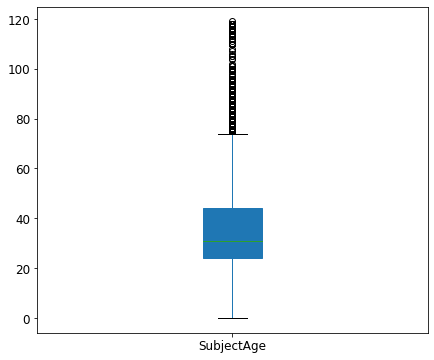

In [12]:
df[['SubjectAge']].boxplot(grid=False,  fontsize=12,figsize=(7, 6),patch_artist = True)


### Checking SubjectHeight and SubjectWeight anomalies

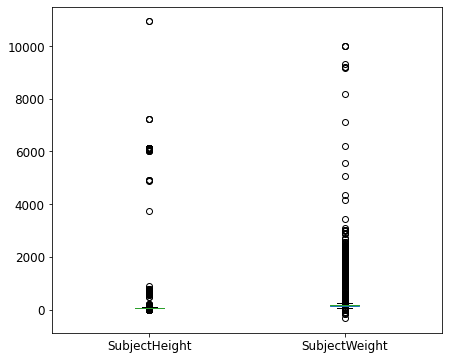

In [13]:
df[['SubjectHeight','SubjectWeight']].boxplot(grid=False,  fontsize=12,figsize=(7, 6),patch_artist = True)

### Explore Subject Race 

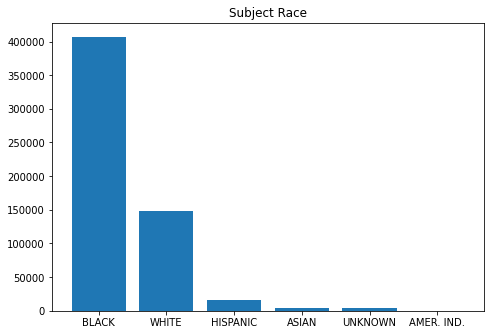

In [14]:
temp = df.SubjectRace.value_counts()

races = pd.DataFrame(temp).index.values
count = np.transpose(np.squeeze(temp.to_numpy()))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(races,count)
ax.set_title('Subject Race')
plt.show()

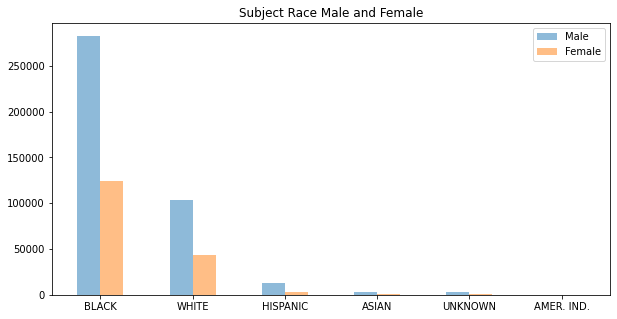

In [15]:
temp = df.SubjectRace.value_counts()
races = pd.DataFrame(temp).index.values

male = df[(df.SubjectGender == 'MALE')]['SubjectRace'].value_counts()
female = df[(df.SubjectGender == 'FEMALE')]['SubjectRace'].value_counts()

races_male = pd.DataFrame(male).index.values
count_race_male = np.transpose(np.squeeze(male.to_numpy()))
races_female = pd.DataFrame(female).index.values
count_race_female = np.transpose(np.squeeze(female.to_numpy()))

pos = list(range(len(temp))) 
width = 0.25
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(pos, count_race_male,  width, alpha=0.5, label=races_male) 
plt.bar([p + width for p in pos], count_race_female, width, alpha=0.5, label=races_female) 
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(races)
ax.set_title('Subject Race Male and Female')
plt.legend(['Male', 'Female'], loc='upper right')
plt.show()


### Explore Vehicle Style and Vehicle Color

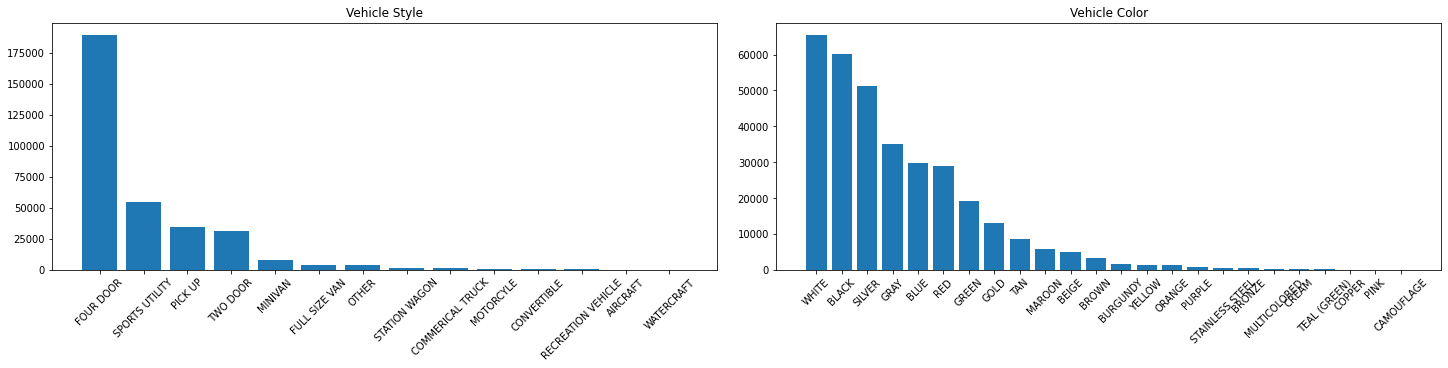

In [16]:
temp_style = df.VehicleStyle.value_counts()
style = pd.DataFrame(temp_style ).index.values
count_style = np.transpose(np.squeeze(temp_style .to_numpy()))

temp_color = df.VehicleColor.value_counts()
color = pd.DataFrame(temp_color).index.values
count_color = np.transpose(np.squeeze(temp_color.to_numpy()))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), constrained_layout=True)
# plot 1st one 
ax1.bar(style,count_style)
ax1.set_title('Vehicle Style')
ax1.set_xticklabels(style, rotation=45)

# plot 2st one 
ax2.bar(color,count_color)
ax2.set_title('Vehicle Color')
ax2.set_xticklabels(color, rotation=45)
plt.show()


### Explore Vehicle Model

Model Count 375


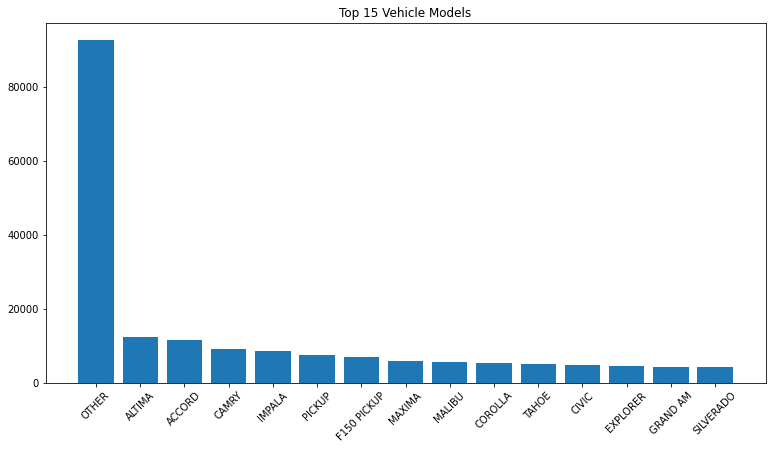

In [17]:
temp = df.VehicleModel.value_counts()
print('Model Count {}'.format(len(temp)))
top_model = pd.DataFrame(temp).iloc[0:15]

model = pd.DataFrame(top_model).index.values
count_model = np.transpose(np.squeeze(top_model.to_numpy()))

fig = fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(model,count_model)
ax.set_title('Top 15 Vehicle Models')
ax.set_xticklabels(model, rotation=45)
plt.show()

### Explore Reason for Stop

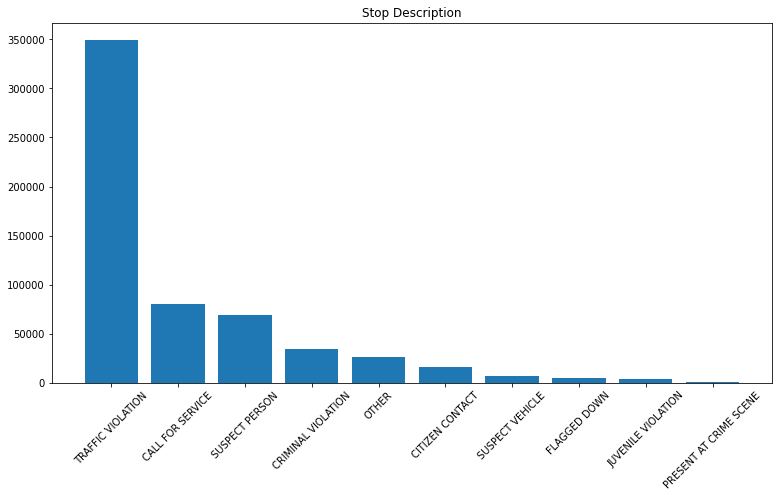

In [18]:
temp = df.StopDescription.value_counts()

stop = pd.DataFrame(temp).index.values
count_stop = np.transpose(np.squeeze(temp.to_numpy()))

fig = fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(stop,count_stop)
ax.set_title('Stop Description')
ax.set_xticklabels(stop, rotation=45)
plt.show()


### 7. Handle Outliers

#### Searching outliers out of range
#### Age outside range of 15-90 year-old
#### Height outside range of 4-7 foot tall
#### Weight outside range of 3-500 lbs

In [27]:
### Age
lower = 15
upper = 90
temp = df.loc[:,'SubjectAge']
outliers_age = [x for x in temp if x < lower or x > upper]
print('Age\t Lower:{} Upper:{}  Outliers count:{}'.format(lower,  upper, len(outliers_age)))

### Height
lower = 4 * 12
upper = 7 * 12
temp = df.loc[:,'SubjectHeight']
outliers_height = [x for x in temp if x < lower or x > upper]
print('Height\t Lower:{} Upper:{}  Outliers count:{}'.format(lower,  upper, len(outliers_height)))

### Weight
lower = 3
upper = 500
temp = df.loc[:,'SubjectWeight']
outliers_weight = [x for x in temp if x < lower or x > upper]
print('Weight\t Lower:{} Upper:{}  Outliers count:{}'.format(lower,  upper, len(outliers_weight)))


Age	 Lower:15 Upper:90  Outliers count:0
Height	 Lower:48 Upper:84  Outliers count:0
Weight	 Lower:3 Upper:500  Outliers count:0


### Remove outliers with Age outside range of 15-90 year-old
### Height outside range of 4-7 foot tall
### Weight outside range of 3-500 lbs

In [28]:
origin_count = len(df)
print('Original rows count {}'.format(origin_count))

## Age
lower = 15
upper = 90
temp = df.loc[:,'SubjectAge']
outliers_age = [x for x in temp if x < lower or x > upper]
print('Found outliers_age count {}'.format(len(outliers_age)))
# get rows
outliers_age_rows = df[df['SubjectAge'].isin(outliers_age)]
df.drop(outliers_age_rows.index, inplace=True)
print('\tAfter droppred outliers_age {}'.format(len(df)))

## Height
lower = 4 * 12
upper = 7 * 12
temp = df.loc[:,'SubjectHeight']
outliers_height = [x for x in temp if x < lower or x > upper]
print('Found outliers_height count {}'.format(len(outliers_height)))
# get rows
outliers_height_rows = df[df['SubjectHeight'].isin(outliers_height)]
df.drop(outliers_height_rows.index, inplace=True)
print('\tAfter droppred outliers_Height {}'.format(len(df)))

## Weight
lower = 3
upper = 500
temp = df.loc[:,'SubjectWeight']
outliers_weight = [x for x in temp if x < lower or x > upper]
print('Found outliers_weight count {}'.format(len(outliers_weight)))
# get rows
outliers_weight_rows = df[df['SubjectWeight'].isin(outliers_weight)]
df.drop(outliers_weight_rows.index, inplace=True)
print('\tAfter droppred outliers_weight {}'.format(len(df)))

rows_remain = len(df)
print('Number rows were dropped {}'.format(origin_count-rows_remain))
print('Number rows remains {}'.format(rows_remain))


Original rows count 581431
Found outliers_age count 0
	After droppred outliers_age 581431
Found outliers_height count 0
	After droppred outliers_Height 581431
Found outliers_weight count 0
	After droppred outliers_weight 581431
Number rows were dropped 0
Number rows remains 581431


### Assert no outliers

In [21]:
df[['SubjectAge','SubjectHeight','SubjectWeight']].describe()

,SubjectAge,SubjectHeight,SubjectWeight
count,563720.000000,563854.000000,563830.000000
mean,34.742037,68.129005,170.227373
std,13.170256,3.791495,38.864172
min,15.000000,48.000000,3.000000
25%,24.000000,66.000000,145.000000
50%,32.000000,68.000000,165.000000
75%,44.000000,71.000000,190.000000
max,90.000000,84.000000,500.000000


### 8. Handle Invalid Values

In [32]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581431 entries, 0 to 593892
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   FieldInterviewID       581431 non-null  int64  
 1   NOPD_Item              489302 non-null  object 
 2   EventDate              581431 non-null  object 
 3   District               581431 non-null  int64  
 4   Zone                   581431 non-null  object 
 5   OfficerAssignment      581308 non-null  object 
 6   StopDescription        581431 non-null  object 
 7   ActionsTaken           458088 non-null  object 
 8   VehicleYear            326695 non-null  float64
 9   VehicleMake            331653 non-null  object 
 10  VehicleModel           313514 non-null  object 
 11  VehicleStyle           324693 non-null  object 
 12  VehicleColor           327785 non-null  object 
 13  SubjectID              567384 non-null  float64
 14  SubjectRace            567384 non-nu

#### Found invalid 0.0 Latitude and Longtitude. Replace with NaN

In [35]:
print('Found invalid lat lon 0.0 count: {}'.format(len(df[(df.Longitude == 0.0) & (df.Latitude == 0.0)][['Longitude','Latitude']])))

Found invalid lat lon 0.0 count: 98005


In [36]:
df[['Longitude','Latitude']] = df[['Longitude','Latitude']].replace(0.0, np.nan )
print('After fix {}'.format(df[['Longitude','Latitude']].head(5)))

After fix    Longitude  Latitude
0        NaN       NaN
1        NaN       NaN
2        NaN       NaN
3        NaN       NaN
4        NaN       NaN


### 9. Save a cleaned DataFrame to CSV file

In [ ]:
df.to_csv("Stop_and_Search__Field_Interviews_Cleaned.csv", index = False)